In [97]:
import re
import os
import pandas as pd

   # Final Project
   This goal of this project is to disambiguate semantic roles in AMR that have multiple mappings in UMR (1:2,3). We have a dataest consisting of 5 parallel graphs.
   * Lindsay
   * Philippines Landslide
   * Putin
   * Edmund Pope
   * Pear Story

## Get Dataset Metrics and Split Role Definitions

In [98]:
# put all files in dicts, right now just strings, should probably update to better type for the graph
umr_files = {}
amr_files = {}

umr_path = os.getcwd() + '\\UMR-data-english'
amr_path = os.getcwd() + '\\AMR-data-english'

for f in os.listdir(umr_path):
    file1 = open(umr_path + '\\' + f, 'r')
    umr_files[f] = file1.read()

for f in os.listdir(amr_path):
    file1 = open(amr_path + '\\' + f, 'r')
    amr_files[f] = file1.read()

#Do not have all of the UMR annotations for the Putin document, so just grab everything before this sentence id from AMR
amr_files["putin_ENG_0152_2000_1208-AMR.txt"] = amr_files["putin_ENG_0152_2000_1208-AMR.txt"].split("::id NW_PRI_ENG_0152_2000_1208.13")[0]

print(umr_files)
print(amr_files)


{'lindsay-umr.txt': 'user name: jbonn\nuser id: 37\nfile language: english\nfile format: plain_text\nDoc ID in database: 1350\nexport time: 7/15/2023, 7:52:55 AM\n\n# :: snt1\t\n# Sentence:  Lindsay left in order to eat lunch .\n# sentence level graph:\n(s1l / leave-02\n    :ARG0 (s1p / person\n        :name (s1n / name :op1 "Lindsay"))\n    :Aspect Performance\n    :MODSTR FullAff\n    :purpose (s1e / eat-01\n        :ARG0 s1p\n        :ARG1 (s1l2 / lunch)\n        :Aspect Performance\n        :MODSTR FullAff))\n\n# alignment:\ns1l: 2-2\ns1p: 1-1\ns1n: 0-0\ns1e: 6-6\ns1l2: 7-7\n\n# document level annotation:\n(s1s0 / sentence\n    :temporal ((DCT :before s1l)\n            (s1l :after s1e))\n    :modal ((ROOT :MODAL AUTH)\n            (AUTH :FullAff s1l)\n            (AUTH :FullNeg s1e)))\n\n\n# :: snt2\t\n# Sentence:  If it rains , Alana won\'t water the plants .\n# sentence level graph:\n(s2w / water-01\n    :ARG0 (s2p / person\n        :name (s2n / name :op1 "Alana"))\n    :ARG1 (s2

#### Split Roles


The roles in green
<iframe src="https://drive.google.com/file/d/1iQhPIp0NwKRSu4ZUXIgIkMUF9EHHlIiQ/preview" width="640" height="480" allow="autoplay"></iframe>

In [99]:
def get_all_counts(roles_set, files_dict):
    #gets all the counts for all the items in a set of roles for all the files in files_dict
    #returns a dict with file names for keys with value of roles_ict with new counts
    roles_dict = dict.fromkeys(roles_set,0)
    files_counts = {}
    for f in files_dict.keys():
        #dict of amr roles to find
        roles_dict = roles_dict.copy()# reset the values at each iteration (dicts are mutable)
        for role in roles_dict.keys():
            roles_dict[role] = len(re.findall(r'{0}\s'.format(re.escape(role)), files_dict[f]))
        files_counts[f] = roles_dict
    return files_counts

amr_roles= {":mod",
            ":cause",
            ":part", 
            ":consist-of",
            ":source",
            ":destination",
            ":condition",
            ":concession"}

umr_roles = {":mod", #mod with a space to avoid modal
                  ":other-role",
                  ":cause",
                  ":reason",
                  ":part",
                  ":group",
                  ":material",
                  ":source",
                  ":start",
                  ":goal",
                  ":recipient",
                  ":condition",
                  ":concessive-condition",
                  ":concession"}

amr_files_counts = get_all_counts(amr_roles, amr_files)
umr_files_counts = get_all_counts(umr_roles, umr_files)
print(umr_files_counts)

{'lindsay-umr.txt': {':condition': 1, ':concession': 0, ':material': 0, ':part': 0, ':other-role': 0, ':cause': 0, ':reason': 0, ':group': 0, ':concessive-condition': 0, ':mod': 0, ':source': 0, ':recipient': 0, ':goal': 0, ':start': 0}, 'Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt': {':condition': 1, ':concession': 2, ':material': 3, ':part': 2, ':other-role': 0, ':cause': 1, ':reason': 3, ':group': 0, ':concessive-condition': 0, ':mod': 26, ':source': 1, ':recipient': 0, ':goal': 1, ':start': 0}, 'lorelei_lorpt-151_putin_2023-release.txt': {':condition': 0, ':concession': 0, ':material': 0, ':part': 0, ':other-role': 0, ':cause': 0, ':reason': 0, ':group': 0, ':concessive-condition': 0, ':mod': 15, ':source': 1, ':recipient': 0, ':goal': 0, ':start': 0}, 'lorelei_lorpt-152_edmundpope_2023-release.txt': {':condition': 0, ':concession': 0, ':material': 0, ':part': 1, ':other-role': 1, ':cause': 0, ':reason': 1, ':group': 0, ':concessive-condition': 0, ':mod': 10, ':source'

In [100]:

amr_counts_df = pd.DataFrame.from_dict(amr_files_counts, orient='index')
amr_counts_df.loc['Total'] = amr_counts_df.sum()
amr_counts_df.loc[:,'Row_Total'] = amr_counts_df.sum(axis=1)
display(amr_counts_df)

,:consist-of,:concession,:condition,:destination,:part,:cause,:mod,:source,Row_Total
edmund_pope-AMR.txt,0,0,0,1,0,0,9,0,10
lindsay-AMR.txt,0,0,1,0,0,0,0,0,1
lorpt-024_Phillipines_landslide_AMR.txt,0,2,1,0,0,0,36,2,41
pear-AMR__of__english-umr-0004.txt,0,0,0,1,1,0,29,4,35
putin_ENG_0152_2000_1208-AMR.txt,0,0,1,0,0,0,17,1,19
Total,0,2,3,2,1,0,91,7,106


In [101]:
umr_counts_df = pd.DataFrame.from_dict(umr_files_counts, orient='index')
umr_counts_df.loc['Total'] = umr_counts_df.sum()
umr_counts_df.loc[:,'Row_Total'] = umr_counts_df.sum(axis=1)
display(umr_counts_df)

,:condition,:concession,:material,:part,:other-role,:cause,:reason,:group,:concessive-condition,:mod,:source,:recipient,:goal,:start,Row_Total
lindsay-umr.txt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt,1,2,3,2,0,1,3,0,0,26,1,0,1,0,40
lorelei_lorpt-151_putin_2023-release.txt,0,0,0,0,0,0,0,0,0,15,1,0,0,0,16
lorelei_lorpt-152_edmundpope_2023-release.txt,0,0,0,1,1,0,1,0,0,10,0,0,1,0,14
Pear_Story_2023-release.txt,0,0,0,2,5,1,2,0,0,18,5,0,1,0,34
Total,2,2,3,5,6,2,6,0,0,69,7,0,3,0,105


In [102]:
#crete role relationship dict

amr2umr_splits = dict.fromkeys(amr_roles,0)
amr2umr_splits[":mod"] = [":mod",":other-role"]
amr2umr_splits[":cause"] = [":cause",":reason"]
amr2umr_splits[":part"] = [":part"]
amr2umr_splits[":cause"] = [":cause",":reason"]
amr2umr_splits[":source"] = [":material",":source",":start"]
amr2umr_splits[":consist-of"] = [":part",":group",":material"]
amr2umr_splits[":destination"] = [":goal",":recipient"]
amr2umr_splits[":condition"] = [":condition",":concessive-condition"]
amr2umr_splits[":concession"] = [":concession",":concessive-condition"]


In [103]:
#print out relationship graph
for i in amr2umr_splits:
    j_list = []
    for j in amr2umr_splits[i]:
        j_list.append(j +" " + str(umr_counts_df.loc["Total"][j]))

    print("AMR: ", i, amr_counts_df.loc['Total'][i],"; UMR: ",j_list)

AMR:  :consist-of 0 ; UMR:  [':part 5', ':group 0', ':material 3']
AMR:  :concession 2 ; UMR:  [':concession 2', ':concessive-condition 0']
AMR:  :condition 3 ; UMR:  [':condition 2', ':concessive-condition 0']
AMR:  :destination 2 ; UMR:  [':goal 3', ':recipient 0']
AMR:  :part 1 ; UMR:  [':part 5']
AMR:  :cause 0 ; UMR:  [':cause 2', ':reason 6']
AMR:  :mod 91 ; UMR:  [':mod 69', ':other-role 6']
AMR:  :source 7 ; UMR:  [':material 3', ':source 7', ':start 0']


## Turning strings into graphs (Not working perfectly yet)

#### UMR graphs extraction (just sentence level)

In [104]:
umr_graphs = {}
for f in umr_files:
    umr_graphs[f] = re.findall(r'(?<=sentence level graph:\n)\([^#]*(?=\n\n#)', umr_files[f])
    print(f,len(umr_graphs[f]))

lindsay-umr.txt 2
Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt 28
lorelei_lorpt-151_putin_2023-release.txt 12
lorelei_lorpt-152_edmundpope_2023-release.txt 9
Pear_Story_2023-release.txt 141


In [105]:
amr_graphs = {}
for f in amr_files:
    amr_graphs[f] = re.findall(r'(?<=[\n])\([^#]*(?=\n|)', amr_files[f])
    print(f,len(amr_graphs[f]))

print(amr_graphs["pear-AMR__of__english-umr-0004.txt"][1])
print(umr_graphs["Pear_Story_2023-release.txt"][1])

edmund_pope-AMR.txt 9
lindsay-AMR.txt 2
lorpt-024_Phillipines_landslide_AMR.txt 28
pear-AMR__of__english-umr-0004.txt 141
putin_ENG_0152_2000_1208-AMR.txt 12
(s2o2 / open-02
  :ARG1 (s2s3 / scene)
  :manner (s2s4 / see-01
            :ARG0 (s2y / you)
            :ARG1 (s2t2 / tree)))


(s2o2 / open-02
  :ARG1 (s2s3 / scene
          :refer-number Singular)
  :manner (s2s4 / see-01
            :ARG0 (s2p2 / person
                    :refer-person 2nd
                    :refer-number Singular)
            :ARG1 (s2t2 / tree
                    :refer-number Singular)
            :Aspect State
            :MODSTR FullAff)
  :Aspect Performance
  :MODSTR FullAff)


#### Parsing sentence-level AMR/UMR strings to actual Graphs

In [173]:
import networkx as nx
from collections import defaultdict

def clean_graph(graph_str):
    #1:clean graph takes in a string, strips the white space aroung it, makes consistent indentations
    #2:changes all ': text' to start on its own line for the sake of graph making
    graph_str = graph_str.rstrip()

    indent = 4 #just pick an indentation level, will fix after everything is on a new line
    
    #1. consistent indentation- everything will be 4 spaces
    head_spaces = {}
    spacings = []
    all_lines = graph_str.splitlines()
    #start by retrieving all spaces
    for line in all_lines:
        dist = len(line) - len(line.lstrip())
        spacings.append(dist)
    
    #Create new spacings
    no_dupes = []
    [no_dupes.append(x) for x in spacings if x not in no_dupes]
    new_spacings = [sorted(no_dupes).index(x) * 4 for x in spacings]

    #switch out the spacings
    for line_i in range(len(all_lines)):
        all_lines[line_i]=new_spacings[line_i] *' ' + all_lines[line_i].lstrip()
    graph_str = '\n'.join(all_lines)
    
    #2: splits :x to be its own line
    lines= re.findall(r'.*:.*:.*',graph_str)# find lines with multiple ":"
    for line in lines:
        #actually does the replacement on new level
        line = line.split(':')
        for i in range(2,len(line)):
            num_spaces = len(line[0]) - len(line[0].lstrip())
            new_str = '\n' + ' ' * num_spaces + indent * ' ' + ":"
            graph_str = re.sub(r'(?<=[^\s]) :', new_str,graph_str,count = 1)    

    return graph_str




def get_head_spacing(curr_spacing, head_dict):
    #get the head of current line based on spacing
    all_spacings = list(head_dict.keys())
    all_spacings.sort()
    i = all_spacings.index(curr_spacing)
    head_spacing = all_spacings[i-1]
    return head_spacing
    


def extract_node(node_str,i):
    #get node, it's id and edge relation from the line (node_str)
    # i (the line the nodestr is on) will be used as a unique identifier
    node_str = node_str.strip()
    node_list = node_str.split(' / ')
    if len(node_list) == 1:
        #no name, just a reference to an id within the graph
        #print(node_list)
        #create new id for the graph so that we don't accidently duplicate the nodes when adding
        node_list= node_list[0].split(" ")
        node = node_list[1]
        edge = node_list[0]
        node = node.strip(" ()")
        g_id = node + str(i)


    else:
        node = node_list[-1].strip(')')

        if node_list[0][0] != ":":
            edge = None
            g_id = node_list[0].strip(" ()") 
            g_id = g_id + str(i)
        else:
            [edge,g_id] = node_list[0].split(" (")
            g_id = g_id + str(i)
    return node, g_id,edge

def create_graph(graph_str):
    head_dict = {}
    G = nx.DiGraph()

    graph_str = clean_graph(graph_str)
    for i in range(len(graph_str.splitlines())):
        #extact node and edge, get spacing to know what to attach it to 
        curr_line = graph_str.splitlines()[i]
        curr_node, g_id, edge = extract_node(curr_line,i) 
        curr_spacing = len(curr_line) - len(curr_line.lstrip())
        head_dict[curr_spacing] = g_id #update thespacing level to point to this node
        if i == 0:
            #add top  node to the graph
            G.add_node(g_id,name = curr_node)
        else:
            #get head_node spacing
            head_spacing = get_head_spacing(curr_spacing, head_dict)
            head_node_id= head_dict[head_spacing]
        
            #attach curr_node to head_node
            G.add_node(g_id,name=curr_node)
            G.add_edge(head_node_id,g_id, label = edge)#add whatever is last in the heap
            
    return G

            

            


G = create_graph(amr_graphs['lindsay-AMR.txt'][0])

#### Draw a Graph

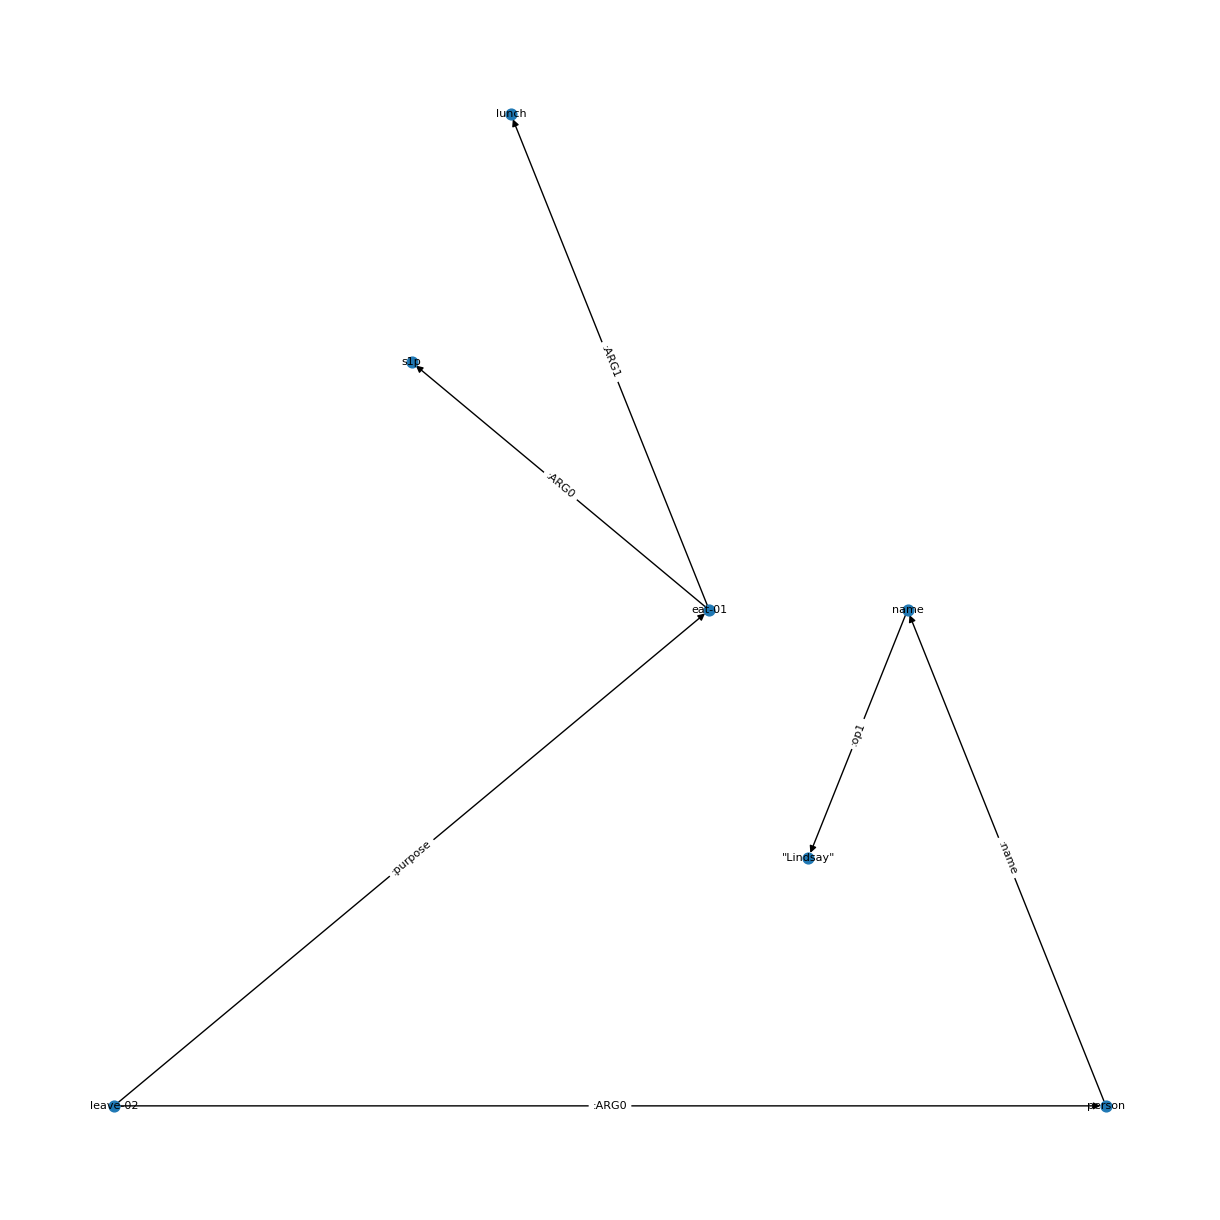

In [131]:
import matplotlib.pyplot as plt
def draw_graph(G):
    pos = nx.planar_layout(G)
    plt.figure(1,figsize=(12,12)) 
    nx.draw(G,pos, with_labels = True,labels = nx.get_node_attributes(G, 'name'),node_size=60,font_size=8)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'label'),font_size=8)
draw_graph(G)

#### Create all umr_graphs and amr_graphs


In [174]:
umr_final_graphs = {}
for file in umr_graphs.keys():
    umr_final_graphs[file] = []
    for sent in umr_graphs[file]:
          umr_final_graphs[file].append(create_graph(sent))

amr_final_graphs = {}
for file in amr_graphs.keys():
    amr_final_graphs[file] = []
    for sent in amr_graphs[file]:
        amr_final_graphs[file].append(create_graph(sent))



(s6s / show-01 
    :ARG0 (s6f / footage 
        :topic (s6v / village 
            :ARG1-of (s6d / devastate-01
                :Aspect State
                :MODSTR FullAff))
        :ord (s6o / ordinal-entity
            :value 1))
    :ARG1 (s6s2 / sea
        :material (s6m / mud) 
        :ARG0-of (s6c / cover-01 
            :ARG1 (s6t / thing 
                :ARG1-of (s6i2 / identity-91
                    :ARG2 (s6f2 / farmland  
                        :mod (s6l / lush)
                        :mod (s6g / green)
                        :place (s6v2 / valley))
                    :Aspect State
                    :MODSTR FullAff))
            :Aspect State
            :MODSTR FullAff))
    :Aspect State
    :MODSTR FullAff)


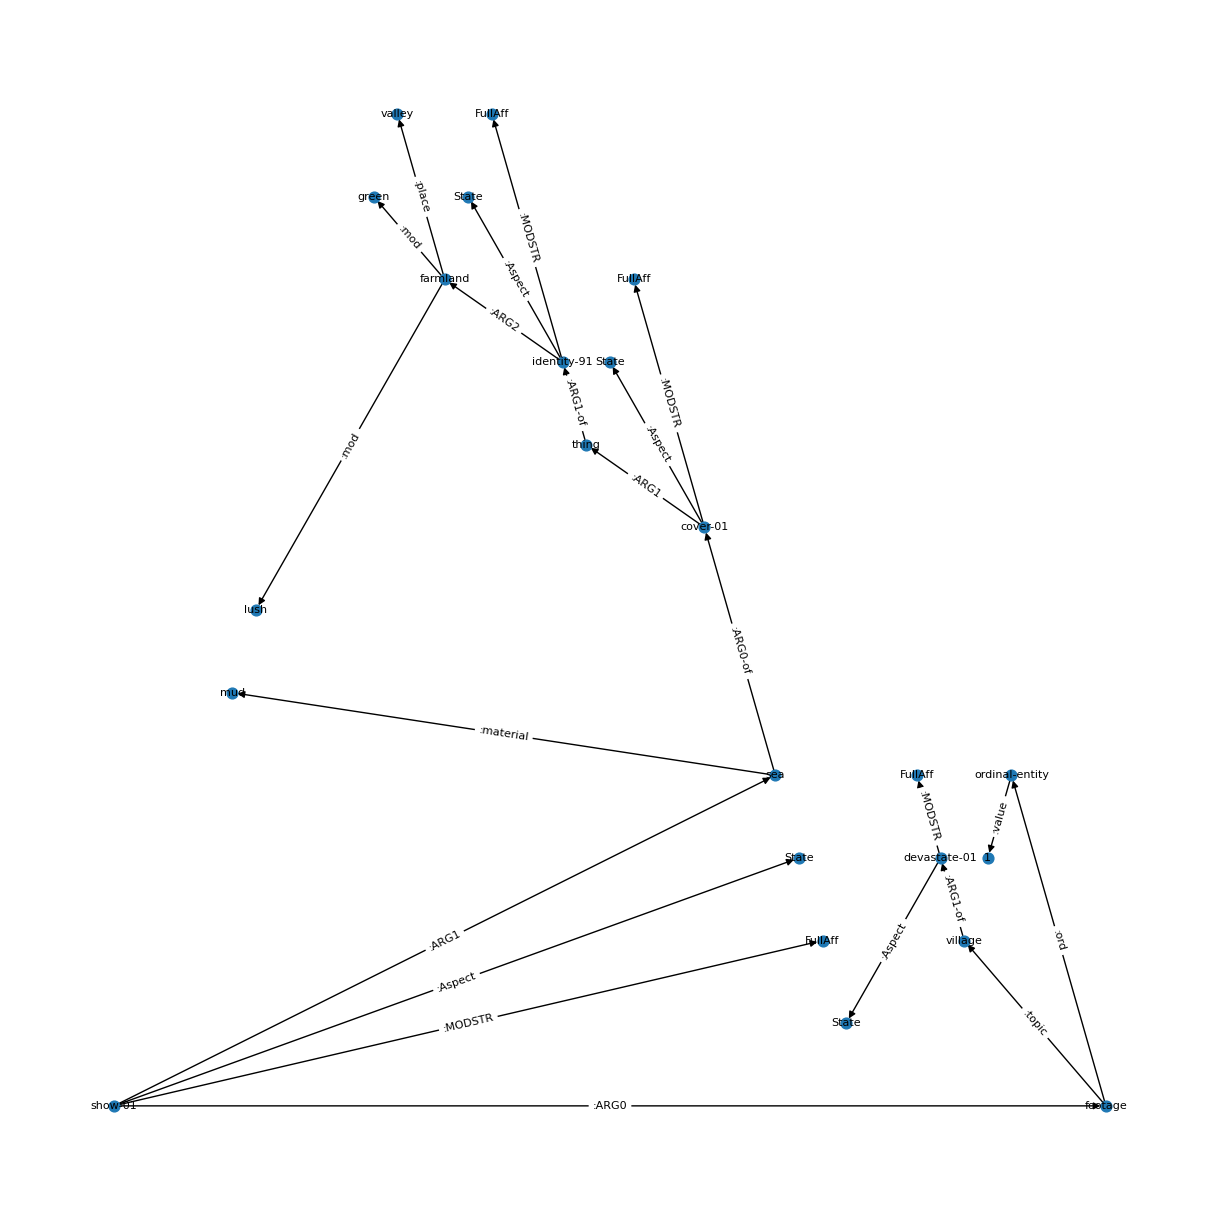

In [175]:
G= clean_graph(umr_graphs['Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt'][5])
print(G)
create_graph(umr_graphs['Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt'][5])
draw_graph(umr_final_graphs['Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt'][5])
##print(umr_graphs['Lorelei_lorpt-024_Philippines_Landslide_2023-release.txt'][5])

(s / show-01
      :ARG0 (f / footage
            :topic (v / village
                  :ARG1-of (d / devastate-01))
            :ord (o / ordinal-entity :value 1))
      :ARG1 (m / mud
            :quant (s2 / sea)
            :ARG0-of (c / cover-01
                  :ARG1 (t / thing
                        :mod (f2 / farmland)
                        :location (v2 / valley
                              :ARG1-of (g / green-02))
                        :mod (l / lush)))))


(s / show-01
    :ARG0 (f / footage
        :topic (v / village
            :ARG1-of (d / devastate-01))
        :ord (o / ordinal-entity
            :value 1))
    :ARG1 (m / mud
        :quant (s2 / sea)
        :ARG0-of (c / cover-01
            :ARG1 (t / thing
                :mod (f2 / farmland)
                :location (v2 / valley
                    :ARG1-of (g / green-02))
                :mod (l / lush)))))


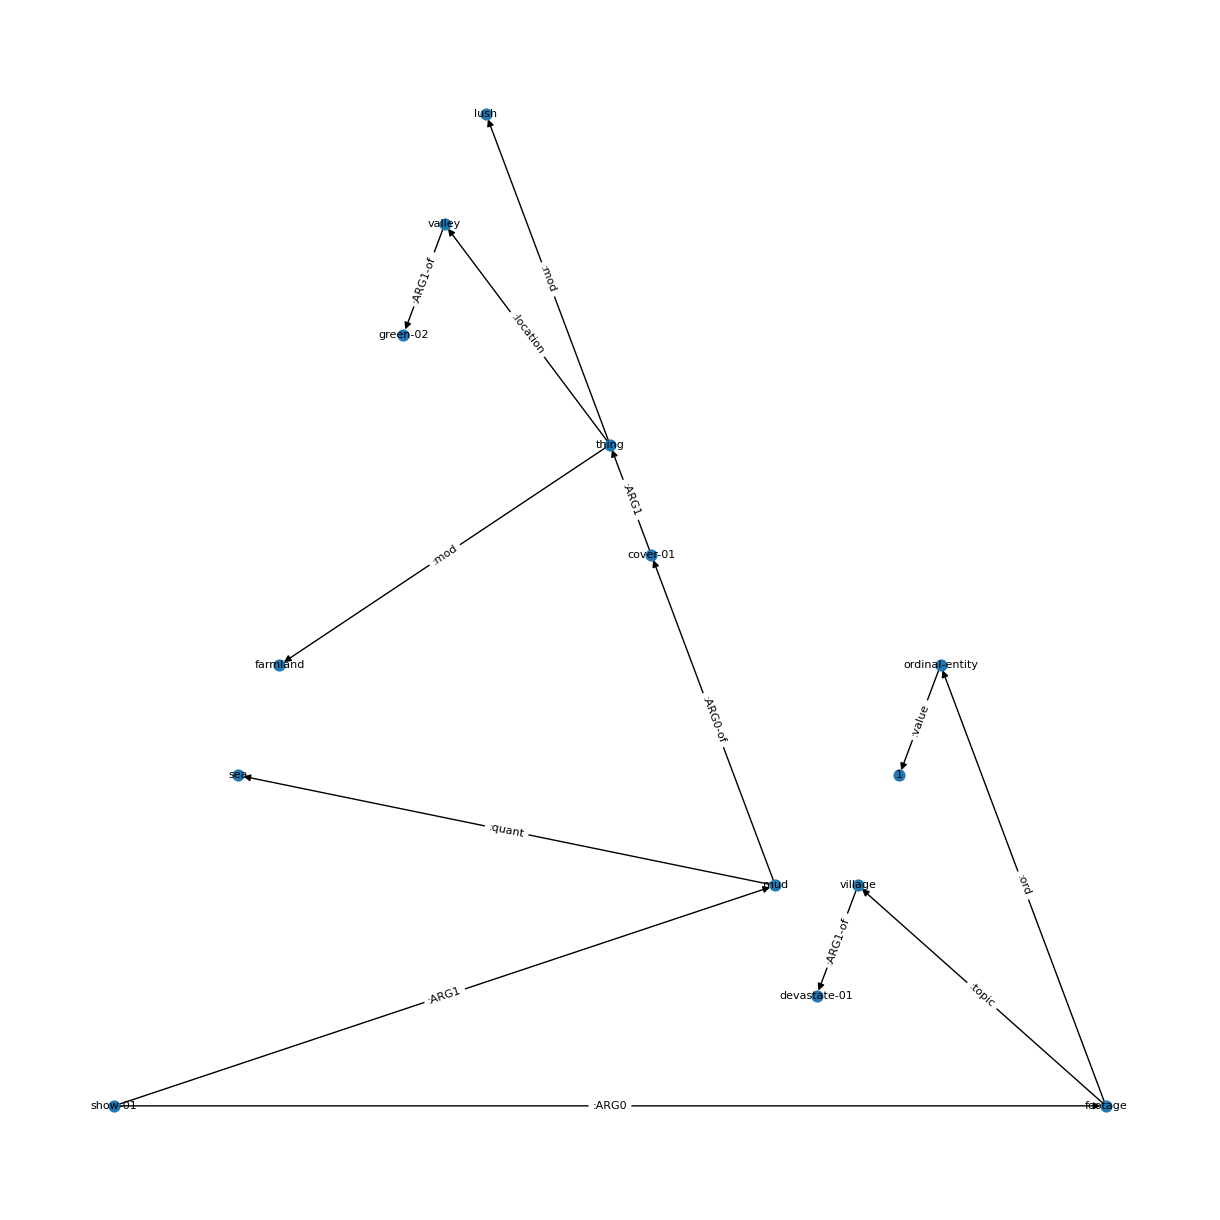

In [177]:

print(amr_graphs['lorpt-024_Phillipines_landslide_AMR.txt'][5])
G = clean_graph(amr_graphs['lorpt-024_Phillipines_landslide_AMR.txt'][5])
print(G)
create_graph(amr_graphs['lorpt-024_Phillipines_landslide_AMR.txt'][5])
draw_graph(amr_final_graphs['lorpt-024_Phillipines_landslide_AMR.txt'][5])
